In [23]:
import matplotlib.pyplot as plt
from matplotlib import cm, style
from matplotlib.ticker import LinearLocator
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import optimize, fftpack
from scipy.integrate import odeint
from matplotlib.colors import LogNorm

1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

Minimum point (x,y): [ 0.08997401 -0.71263773]
Minimum value of f(x,y): -1.0316283802422204 

Minimum point (x,y): [-0.08997403  0.71263772]
Minimum value of f(x,y): -1.0316283802206798 

Minimum point (x,y): [0. 0.]
Minimum value of f(x,y): 0.0 



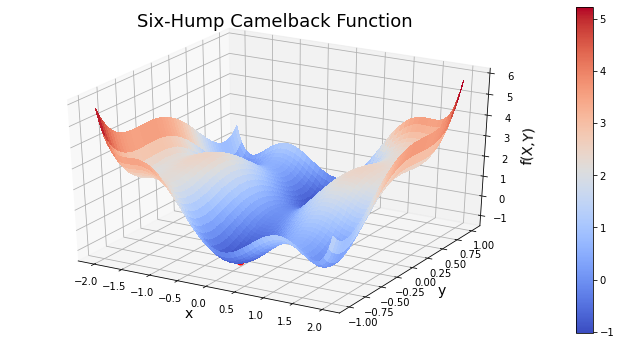

In [24]:
# Define the six-hump camelback function
def f(X):
    return (4 - 2.1 * X[0] ** 2 + X[0] ** 4 / 3) * X[0] ** 2 + X[0] * X[1] + (4 * X[1] ** 2 - 4) * X[1] ** 2

# Create a 3D plot of the function
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')

# Generate data for the plot
X = np.linspace(-2, 2, 200)
Y = np.linspace(-1, 1, 200)
X, Y = np.meshgrid(X, Y)
Z = f((X, Y))

# Plot the surface
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)

# Set axis labels and title
ax.set_xlabel('x', size=14)
ax.set_ylabel('y', size=14)
ax.set_zlabel('f(X,Y)', size=14)
ax.set_title('Six-Hump Camelback Function', size=18)

# Add a color bar to the plot
fig.colorbar(surf)

# Find the minimum point of the function using optimization
f_min = optimize.minimize(f, (0, -0.75), method='SLSQP')
print('Minimum point (x,y):', f_min.x)
print('Minimum value of f(x,y):', f_min.fun, '\n')
ax.scatter(*f_min.x, f_min.fun, c='r', marker='o', s=50)

f_min = optimize.minimize(f, (0, 0.75), method='SLSQP')
print('Minimum point (x,y):', f_min.x)
print('Minimum value of f(x,y):', f_min.fun, '\n')
ax.scatter(*f_min.x, f_min.fun, c='r', marker='o', s=50)

f_min = optimize.minimize(f, (0, 0), method='SLSQP')
print('Minimum point (x,y):', f_min.x)
print('Minimum value of f(x,y):', f_min.fun, '\n')
ax.scatter(*f_min.x, f_min.fun, c='r', marker='o', s=50)

plt.show()


2\. **Non-linear ODE: the damped pendulum**

The equation of the motion that a pendulum makes with respect to the angle $\theta$ with the vertical is given by:

$$\frac{d^2\theta}{dt^2} = -\frac{1}{Q} \frac{d\theta}{dt} + \sin\theta + d \cos\Omega t$$

where $t$ is time, $Q$ is the damping factor, $d$ is the forcing amplitude, and $\Omega$ is the driving frequency of the forcing. 

This second order ODE needs to be written as two coupled first order ODEs defining a new variable $\omega \equiv d\theta/dt$:

$$\frac{d\theta}{dt} = \omega$$
$$\frac{d\omega}{dt} = -\frac{1}{Q}\,\omega + \sin\theta + d \cos\Omega t$$

Consider the initial conditions $\theta_0 = \omega_0 = 0$, and $Q = 2.0$, $d = 1.5$, and $\omega = 0.65$.

 - Solve the ODE with `odeint` over a pariod of 200 time steps
 - Create two plots, one of $\theta$ as a function of the time, and $\omega$ as a function of the time
 - **Optional**: determine if there is a set of parameters for which the motion is chaotic.

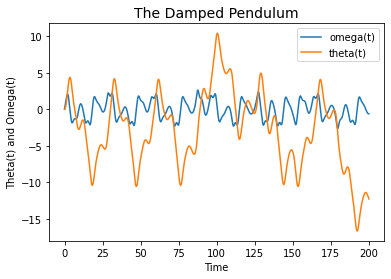

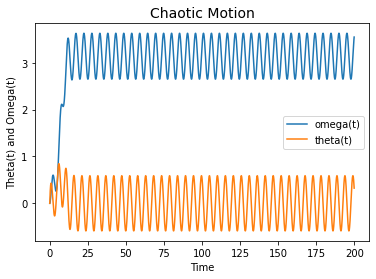

In [25]:
# Define the function for the motion equation
def motion_eq(init_cond, time, Q, d, omega):
    omega_0, theta_0 = init_cond # initial conditions
    dtheta_dt = omega_0
    domega_dt = np.sin(theta_0) + d * np.cos(omega * time) - (1/Q) * omega_0
    return np.array([domega_dt, dtheta_dt])

# Set times to get the solution at
time = np.arange(0, 200, 0.05)

# Set initial conditions and parameters for the damped pendulum
init_cond1 = [0, 0]
params1 = (2, 1.5, 0.65)

# Solve the problem, recover omega and theta arrays
omega, theta = odeint(motion_eq, init_cond1, time, args=params1).T

# Plot the solution for the damped pendulum
plt.plot(time, omega, label='omega(t)')
plt.plot(time, theta, label='theta(t)')
plt.title("The Damped Pendulum", fontsize=14)
plt.xlabel('Time')
plt.ylabel('Theta(t) and Omega(t)')
plt.legend()
plt.show()

# Set initial conditions and parameters for chaotic motion
init_cond2 = [0, 0]
params2 = (0.5, 1.2, 1.2)

# Solve the problem, recover omega and theta arrays
theta, omega = odeint(motion_eq, init_cond2, time, args=params2).T

# Plot the solution for chaotic motion
plt.plot(time, omega, label='omega(t)')
plt.plot(time, theta, label='theta(t)')
plt.title("Chaotic Motion", fontsize=14)
plt.xlabel('Time')
plt.ylabel('Theta(t) and Omega(t)')
plt.legend()
plt.show()


3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

The dataset is the one dowloaded at the beginning of Lecture 06:

 - `!wget https://www.dropbox.com/s/ebe1cnyd2gm836a/populations.txt -P data/`

In [26]:
!wget https://www.dropbox.com/s/ebe1cnyd2gm836a/populations.txt -P data/

--2023-02-20 23:12:27--  https://www.dropbox.com/s/ebe1cnyd2gm836a/populations.txt
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/ebe1cnyd2gm836a/populations.txt [following]
--2023-02-20 23:12:27--  https://www.dropbox.com/s/raw/ebe1cnyd2gm836a/populations.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc00f762d87a8a9edae3ffc79fda.dl.dropboxusercontent.com/cd/0/inline/B26CLYcuherjCsnCfnNPdHSV2qN4VanrjnQwYyzObfb5M0x_ck7e3FXZcqZC5ajrNc9Y5HL5-Ccubx2BEXggBL2Enq12D1h5oME_PTQJ-E3YIqz-7aGGjUpw1lzECjD8azilsTfITa0i1yai6kxxJbV1SzZ5TtVdOvJgv11c9A6vTA/file# [following]
--2023-02-20 23:12:28--  https://uc00f762d87a8a9edae3ffc79fda.dl.dropboxusercontent.com/cd/0/inline/B26CLYcuherjCsnCfnNPdHSV2qN4VanrjnQwYyzObfb5M0x_ck7e3FXZcqZC5ajrNc9Y5HL

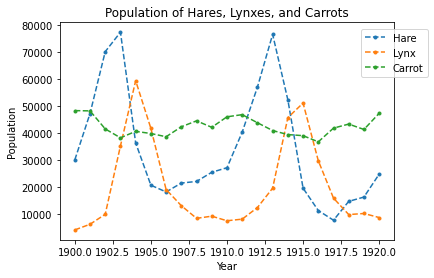

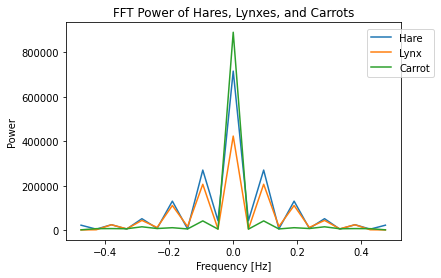

In [27]:

# Load the population data
populations = pd.read_csv("/content/data/populations.txt", sep="\t")
populations.rename(columns={'# year': 'year'}, inplace=True)

# Plot the population data
plt.plot(populations['year'], populations['hare'], ls='--', marker='.',label='Hare')
plt.plot(populations['year'], populations['lynx'], ls='--', marker='.',label='Lynx')
plt.plot(populations['year'], populations['carrot'], ls='--', marker='.', label='Carrot')
plt.title('Population of Hares, Lynxes, and Carrots')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend(loc=(0.9, 0.75))
plt.show()

# Calculate the FFT of the population data
hares_fft, hares_fft_power = fftpack.fft(populations['hare'].values), np.abs(fftpack.fft(populations['hare'].values))
lynxes_fft, lynxes_fft_power = fftpack.fft(populations['lynx'].values), np.abs(fftpack.fft(populations['lynx'].values))
carrots_fft, carrots_fft_power = fftpack.fft(populations['carrot'].values), np.abs(fftpack.fft(populations['carrot'].values))

# Get the corresponding frequencies
sample_freq = fftpack.fftfreq(populations.shape[0])

# Plot the FFT power
plt.plot(fftpack.fftshift(sample_freq), fftpack.fftshift(hares_fft_power), label='Hare')
plt.plot(fftpack.fftshift(sample_freq), fftpack.fftshift(lynxes_fft_power), label='Lynx')
plt.plot(fftpack.fftshift(sample_freq), fftpack.fftshift(carrots_fft_power), label='Carrot')
plt.title('FFT Power of Hares, Lynxes, and Carrots')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power')
plt.legend(loc=(0.9, 0.75))
plt.show()


# Define a function to filter periodic signals
def filter_periodic_signal(data, column, fft, color):
  # Get the FFT power
  power = np.abs(fft)

  # Find the peak frequency
  pos_mask = np.where(sample_freq > 0)
  freqs = sample_freq[pos_mask]
  peak_freq = freqs[power[pos_mask].argmax()]

  # Filter out high frequency components
  filtered_fft = fft.copy()
  filtered_fft[np.abs(sample_freq) > peak_freq] = 0

  # Get the filtered signal
  filtered_signal = fftpack.ifft(filtered_fft)
  filtered_signal = np.real(filtered_signal)

  # Plot the original and filtered signals
  plt.plot(data['year'], data[column], ls='--', marker='.', alpha=0.5, label='Original Signal ' + column, color=color)
  plt.plot(data['year'], filtered_signal, ls='--', marker='.', alpha=0.5, label='Filtered Signal ' + column, color=color)
  plt.xlabel('Year')
  plt.ylabel('Amplitude')
  plt.show()

 


4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("images/moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise.
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
* Apply the inverse Fourier transform to plot the resulting image.

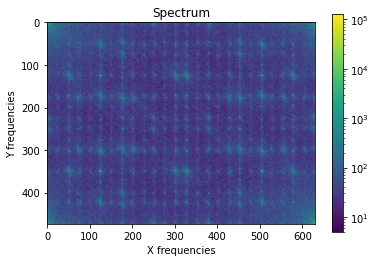

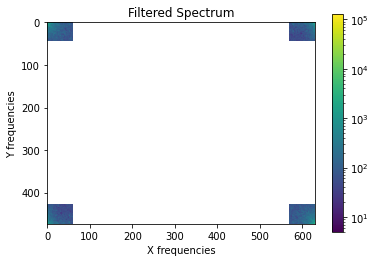

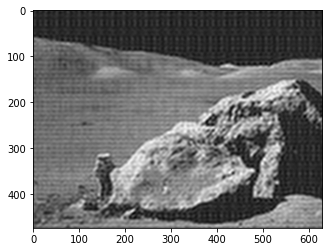

In [29]:
# Import the image as a 2D numpy array using plt.imread("images/moonlanding.png")
image = plt.imread('/content/moonlanding.png')

# Examine the image with plt.imshow(), which is heavily contaminated with periodic noise.
plt.imshow(image, cmap='gray')

# 2D FFT of the image
image_fft = fftpack.fft2(image)

# Plot the spectrum (Fourier transform of) the image
sepc = plt.imshow(np.abs(image_fft), norm=LogNorm(vmin=5))
plt.title('Spectrum')
plt.xlabel('X frequencies')
plt.ylabel('Y frequencies')
plt.colorbar(sepc)
plt.show()

# Filter the spectrum (set to 0 high freq components)
coeff = 0.1 
x, y = image_fft.shape
image_fft[int(x*coeff):int(x*(1-coeff))] = 0
image_fft[:, int(y*coeff):int(y*(1-coeff))] = 0

sepc = plt.imshow(np.abs(image_fft), norm=LogNorm(vmin=5))
plt.title('Filtered Spectrum')
plt.xlabel('X frequencies')
plt.ylabel('Y frequencies')
plt.colorbar(sepc)
plt.show()

# Apply the inverse Fourier transform to plot the resulting image.
filt_image = fftpack.ifft2(image_fft).real
plt.imshow(filt_image, cmap='gray')
plt.show()